# YouTube Trending Videos Statistical Analysis

## INTRODUCTION

#### to be edited</b>
<b>https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

In [74]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp

%matplotlib inline

In [75]:
'''
Later on we can also remove the ones we wouldn't use
'''
# Importing dataset
data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico

In [76]:
'''
This can stay for now to easily see what are our properties in the dataset. We can delete it once
we are familiar with the dataset
'''
brief_list_col = []
brief_list = []

for i in range(0,len(data_gb.columns)):
    brief_list_col.append(data_gb.columns[i])
    brief_list.append(data_gb[data_gb.columns[i]][0])

brief_df = pd.DataFrame(brief_list_col,columns=["Property"])
brief_df.insert(1,"Output",brief_list,True)
brief_df

,Property,Output
0,video_id,J78aPJ3VyNs
1,title,I left youtube for a month and THIS is what ha...
2,publishedAt,2020-08-11T16:34:06Z
3,channelId,UCYzPXprvl5Y-Sf0g4vX-m6g
4,channelTitle,jacksepticeye
5,categoryId,24
6,trending_date,2020-08-12T00:00:00Z
7,tags,jacksepticeye|funny|funny meme|memes|jacksepti...
8,view_count,2038853
9,likes,353790


In [77]:
'''
Adding json files
'''
gb_json = pd.read_json('../data/GB_category_id.json')
fr_json = pd.read_json('../data/FR_category_id.json')
us_json = pd.read_json('../data/US_category_id.json')
ru_json = pd.read_json('../data/RU_category_id.json')
de_json = pd.read_json('../data/DE_category_id.json')
ca_json = pd.read_json('../data/CA_category_id.json')
kr_json = pd.read_json('../data/KR_category_id.json')
jp_json = pd.read_json('../data/JP_category_id.json')
br_json = pd.read_json('../data/BR_category_id.json')
mx_json = pd.read_json('../data/MX_category_id.json')

In [78]:
'''
Defining function to flat json files to get rid of dictionary format for every country
'''

col_list = ["items","items_snippet"]

def flat_func(df,column):
    for column in col_list:
        flatten = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(i) for i in flatten.columns]
        flatten.columns = [column + "_" + str(colname) for colname in columns]
        df = pd.concat([df,flatten],axis=1)
        df = df.drop(column,axis=1)
    return df

In [79]:
'''
Applying function
Creating flat databases
'''

gb_flat = flat_func(gb_json,col_list)[["items_id","items_snippet_title"]]
fr_flat = flat_func(fr_json,col_list)[["items_id","items_snippet_title"]]
us_flat = flat_func(us_json,col_list)[["items_id","items_snippet_title"]]
ru_flat = flat_func(ru_json,col_list)[["items_id","items_snippet_title"]]
de_flat = flat_func(de_json,col_list)[["items_id","items_snippet_title"]]
ca_flat = flat_func(ca_json,col_list)[["items_id","items_snippet_title"]]
kr_flat = flat_func(kr_json,col_list)[["items_id","items_snippet_title"]]
jp_flat = flat_func(jp_json,col_list)[["items_id","items_snippet_title"]]
br_flat = flat_func(br_json,col_list)[["items_id","items_snippet_title"]]
mx_flat = flat_func(mx_json,col_list)[["items_id","items_snippet_title"]]

In [80]:
'''
Dropping categoryId 29 for each country
'''

data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

def category_remover(country):
    drop_idx = country[country["categoryId"]==29].index
    return drop_idx

data_gb = data_gb.drop(category_remover(data_gb))
data_fr = data_fr.drop(category_remover(data_fr))
data_us = data_us.drop(category_remover(data_us))
data_ru = data_ru.drop(category_remover(data_ru))
data_de = data_de.drop(category_remover(data_de))
data_ca = data_ca.drop(category_remover(data_ca))
data_kr = data_kr.drop(category_remover(data_kr))
data_jp = data_jp.drop(category_remover(data_jp))
data_br = data_br.drop(category_remover(data_br))
data_mx = data_mx.drop(category_remover(data_mx))

In [81]:
'''
Creating function to add trend name next to categoryId for every country
'''
def trend_adder(country_df,country_flat):
    trend = []
    for trend_id in country_df["categoryId"]:
        for i in range(0,len(country_flat)):
            if trend_id == int(country_flat["items_id"][i]):
                trend.append(country_flat["items_snippet_title"][i])

    country_df.insert(6,"trend",trend)     

In [82]:
'''
Applying Function
Adding trend column next to categoryId for every country
'''
trend_order_data_country = [data_gb,data_fr,data_us,data_ru,data_de,
                            data_ca,data_kr,data_jp,data_br,data_mx]

trend_order_data_flat = [gb_flat,fr_flat,us_flat,ru_flat,de_flat,
                         ca_flat,kr_flat,jp_flat,br_flat,mx_flat]

for i in range(0,len(trend_order_data_country)):
    trend_adder(trend_order_data_country[i],trend_order_data_flat[i])

In [83]:
'''
Scrapping the most updated row for each link.

Not the best way but kinda stuck while trying to retrieve local variables from function so this will
give us what we want for now..
'''
def get_recent_idx(country):
    latest_idx = []
    for link in np.array(country["video_id"].unique()):
        latest_row = country[(country["video_id"] ==
                                      link)][["view_count"]].nlargest(1,"view_count").index[0]
    
        latest_idx.append(latest_row)
    return country[country.index.isin(latest_idx)]
   
data_gb_unique = get_recent_idx(data_gb)
data_fr_unique = get_recent_idx(data_fr)
data_us_unique = get_recent_idx(data_us)
data_ru_unique = get_recent_idx(data_ru)
data_de_unique = get_recent_idx(data_de)
data_ca_unique = get_recent_idx(data_ca)
data_kr_unique = get_recent_idx(data_kr)
data_jp_unique = get_recent_idx(data_jp)
data_br_unique = get_recent_idx(data_br)
data_mx_unique = get_recent_idx(data_mx)

In [84]:
data_gb_unique.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trend,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
25,WGvdHPfwD-k,Wolves v Sevilla (0-1) | UEFA Europa League Hi...,2020-08-11T22:19:01Z,UC4i_9WvfPRTuRWEaWyfKuFw,BT Sport,17,Sports,2020-08-12T00:00:00Z,bt sport|bt sport official|wolves|wolves sevil...,313473,5249,129,1114,https://i.ytimg.com/vi/WGvdHPfwD-k/default.jpg,False,False,Wolves' remarkable Europa League run comes to ...
36,AdWLrHcnC5I,Shakhtar Donetsk v Basel (4-1) | UEFA Europa L...,2020-08-11T22:56:27Z,UC4i_9WvfPRTuRWEaWyfKuFw,BT Sport,17,Sports,2020-08-12T00:00:00Z,bt sport|bt sport official|bt sport football|b...,156639,2593,47,402,https://i.ytimg.com/vi/AdWLrHcnC5I/default.jpg,False,False,Shakhtar Donetsk set up a Europa League semi-f...
49,uRUh9Ucr_yg,Manchester United v FC Copenhagen (1-0 after e...,2020-08-10T23:10:13Z,UC4i_9WvfPRTuRWEaWyfKuFw,BT Sport,17,Sports,2020-08-12T00:00:00Z,europa league|man utd copenhagen|man utd highl...,772339,10381,517,2466,https://i.ytimg.com/vi/uRUh9Ucr_yg/default.jpg,False,False,Bruno Fernandes scored the only goal to send M...
85,KKPDREbthbs,Sancho Dortmund Transfer Update! Man Utd Trans...,2020-08-10T15:58:55Z,UCMmVPVb0BwSIOWVeDwlPocQ,The United Stand,24,Entertainment,2020-08-12T00:00:00Z,Manchester United|Man United|Man Utd|Mancheste...,250885,7319,427,1179,https://i.ytimg.com/vi/KKPDREbthbs/default.jpg,False,False,Dortmund have issued a Jadon Sancho transfer u...
163,nISQKZmqYo0,Coutinho Agrees Terms & Lacazette Could Be Sol...,2020-08-09T09:04:35Z,UCBTy8j2cPy6zw68godcE7MQ,AFTV,17,Sports,2020-08-12T00:00:00Z,afc|aftv|arsenal|arsenal fan tv|fan cams|arsen...,284154,6871,226,2313,https://i.ytimg.com/vi/nISQKZmqYo0/default.jpg,False,False,Coutinho Agrees Terms & Lacazette Could Be Sol...


## Statistical Analysis

#### Hypothesis 

View counts are largely similar for the US and UK

H0: mu UK == mu US

H1: mu UK != mu US

In [ ]:
"""
First we took a look at the numbers to understand the data set a little better
"""

In [86]:
data_gb_unique['view_count'].mean()

2128238.6995253745

In [87]:
data_gb_unique['view_count'].median()

687993.0

In [88]:
data_gb_unique['view_count'].std()

7214438.945745977

In [89]:
data_us_unique['view_count'].mean()

2799942.168212989

In [90]:
data_us_unique['view_count'].median()

1076658.0

In [91]:
data_us_unique['view_count'].std()

8305210.195639507

In [ ]:
"""
We noticed a big difference in the mean and median and suspected this was due to outliers, so we
plotted these on a scatter plot.
"""

<AxesSubplot:xlabel='video_id', ylabel='view_count'>

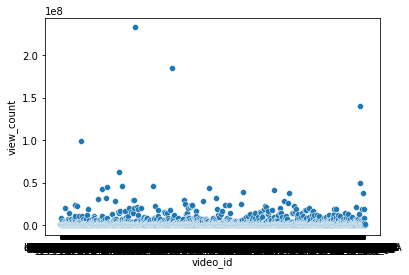

In [92]:
sns.scatterplot(data = data_us_unique, x = 'video_id', y = 'view_count')

<AxesSubplot:xlabel='video_id', ylabel='view_count'>

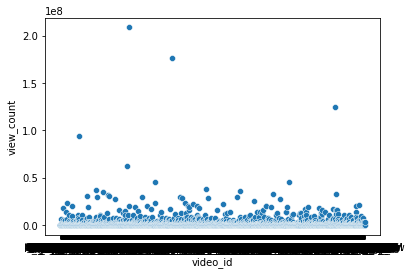

In [94]:
sns.scatterplot(data = data_gb_unique, x = 'video_id', y = 'view_count')

In [ ]:
"""
We removed the top 5 values for both samples as we beleived that these were skewing the data. 
"""

In [159]:
data_us_updated = data_us_unique['view_count'].sort_values(ascending = False).reset_index()
data_us_updated.head(10)

,index,view_count
0,3358,232649205
1,4980,184778248
2,11764,140685439
3,985,98442414
4,2762,62496726
5,11761,49814886
6,2787,45893190
7,3992,45596902
8,2361,45086708
9,6597,43394819


In [116]:
data_us_updated = data_us_updated.drop(index = [0, 1, 2, 3, 4])
data_us_updated.head(3)

,index,view_count
5,11761,49814886
6,2787,45893190
7,3992,45596902


In [160]:
data_gb_updated = data_gb_unique['view_count'].sort_values(ascending = False).reset_index()
data_gb_updated.head(10)

,index,view_count
0,2953,208581468
1,4797,176467113
2,11361,124180499
3,799,93935173
4,2792,62496726
5,9392,45950142
6,3994,45596902
7,6194,37819586
8,1557,37135897
9,7732,36413172


In [118]:
data_gb_updated = data_gb_updated.drop(index = [0, 1, 2, 3, 4])
data_gb_updated.head(3)

,index,view_count
5,9392,45950142
6,3994,45596902
7,6194,37819586


In [ ]:
"""
Next we tested our hypotheses using a t test. 
"""

In [119]:
from scipy.stats import ttest_ind

ttest_ind(data_us_updated['view_count'], data_gb_updated['view_count'], equal_var=False)

Ttest_indResult(statistic=2.25901750823955, pvalue=0.06572079810759457)

We concluded that because our P value is much smaller than critical alpha value (0.05), we could reject our null hypothesis and assume that the average number of views for a video in the US is statistically different from in the UK. 

#### Hypothesis 

The average number of likes on a trending video is greater than 200k 

H0: mean == 200k
H1: mean >200k 

In [ ]:
"""
First we cleaned the data
"""

In [ ]:
us_likes = data_us_unique['likes']

In [ ]:
"""
Then we set our terms and tested the hypothesis. 
"""

In [ ]:
alpha = 0.05

In [161]:
us_likes.mean()

156722.9039935458

In [162]:
us_likes.std()

552001.2496020874

In [ ]:
mu = 200000
x_bar = us_likes.mean()
sigma = us_likes.std()
marg_error = sigma / len(us_likes)

In [ ]:
z = (x_bar - mu) / marg_error
print(z)

In [ ]:
from scipy.stats import norm


In [ ]:
p = norm.cdf(z)
print(1 - p)
p

In [ ]:
"""
A p value of 0 seemed strange, so we tested this again"""
p_values = scipy.stats.norm.sf(abs(z))
p_values

A p value of zero means null hypothesis can be rejected and therefore we can assume mean is greater than 200k for likes. However, we recognise that a p value of zero is almost imopssible in the real world and this hypothesis doesn't really tell us anything meaningful. 

#### Confidence Intervals

In [ ]:
"""
Next we decided to use confidence intervals to determine the mean of our data. 
"""

In [26]:
us_likes
us_likes_stdev = us_likes.std()
degree_freedom = len(us_likes) - 1
t = stats.t.interval(0.95, degree_freedom)[1]

# Terms
mean = us_likes.mean()
std_sample = np.sqrt(abs(np.sum((us_likes - mean)**2) / (1-len(us_likes))))
marg_of_error = std_sample / np.sqrt(len(us_likes))
con_int = [mean - (t * marg_of_error) , mean + (t * marg_of_error)]

print('With 95% confidence, the true mean lies in the inverval:', con_int)

#add the middle point

With 95% confidence, the true mean lies in the inverval: [134982.77747488924, 178463.03051220236]


In [ ]:
"""
Finally, we decided to test another hypothesis related to engagement between countries
"""

Sports engagement in the US is similar to the UK


H0: avg likes US Sports != avg likes UK

H1: avg likes US Sports == avg likes UK

In [ ]:
"""
We spent some time cleaning the data and removing outliers as before
"""

In [146]:
data_us_sport = data_us_unique[['trend', 'view_count']]
data_us_sport = data_us_sport[data_us_sport['trend']== 'Sports']
data_us_sport = data_us_sport.sort_values('view_count', ascending = False)
data_us_sport.head(10)


,trend,view_count
3341,Sports,29422403
4198,Sports,17540334
2769,Sports,16562100
9798,Sports,11702426
5589,Sports,9038619
11643,Sports,8921267
10775,Sports,8222308
9180,Sports,7437813
6567,Sports,7327693
11738,Sports,5567537


<AxesSubplot:>

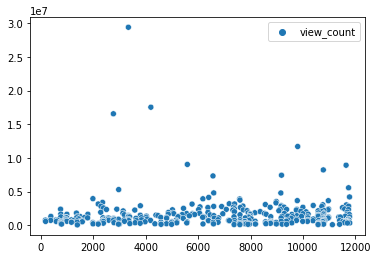

In [147]:
sns.scatterplot(data = data_us_sport)

In [151]:
data_us_sport_updated = data_us_sport.reset_index()
data_us_sport_updated = data_us_sport_updated.drop(index = [0, 1, 2, 3])
data_us_sport_updated.head(10)

,index,trend,view_count
4,5589,Sports,9038619
5,11643,Sports,8921267
6,10775,Sports,8222308
7,9180,Sports,7437813
8,6567,Sports,7327693
9,11738,Sports,5567537
10,2971,Sports,5298383
11,6595,Sports,4804731
12,9155,Sports,4794760
13,11774,Sports,4205199


In [152]:
data_gb_sport = data_gb_unique[['trend', 'view_count']]
data_gb_sport = data_gb_sport[data_gb_sport['trend']== 'Sports']
data_gb_sport = data_gb_sport.sort_values('view_count', ascending = False)
data_gb_sport.head(10)



,trend,view_count
3966,Sports,17063026
2575,Sports,15791351
9585,Sports,11329588
11677,Sports,8921267
7735,Sports,8914786
5386,Sports,8844818
10547,Sports,8106286
9166,Sports,7437813
4594,Sports,6615381
1792,Sports,4917324


<AxesSubplot:>

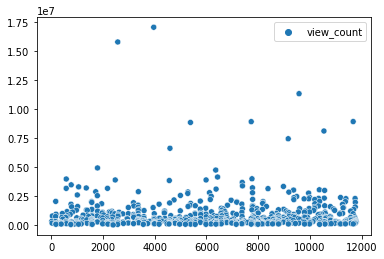

In [153]:
sns.scatterplot(data = data_gb_sport)

In [154]:
data_gb_sport_updated = data_gb_sport.reset_index()
data_gb_sport_updated = data_gb_sport_updated.drop(index = [0, 1, 2])
data_us_sport_updated.head(10)

,index,trend,view_count
4,5589,Sports,9038619
5,11643,Sports,8921267
6,10775,Sports,8222308
7,9180,Sports,7437813
8,6567,Sports,7327693
9,11738,Sports,5567537
10,2971,Sports,5298383
11,6595,Sports,4804731
12,9155,Sports,4794760
13,11774,Sports,4205199


In [155]:
ttest_ind(data_us_sport_updated['view_count'], data_gb_sport_updated['view_count'], equal_var=False)

Ttest_indResult(statistic=6.855485285286144, pvalue=1.7266361261707462e-11)

P value is much smaller than the critical alpha value so we can reject the null hypothesis
Assume therefore that sports engagement is statisticall similar in the UK and US.

In [156]:
data_us_sport_updated['view_count'].mean()

1351870.697740113

In [157]:
data_gb_sport_updated['view_count'].mean()

802952.4208144796